In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv("D:\Feynn_Internhip\Team-C-feynn-lab-market-segmentation--main\Final data sets - BIO-TECH\heart diseses\heart_attack_2.csv")

In [3]:
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [5]:
data['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

The data has more male customers than Female
1. Male population is nearly 4 times of Female population

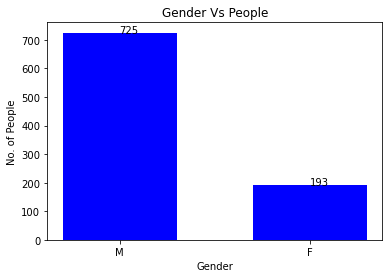

In [6]:
plt.bar(dict(data['Sex'].value_counts()).keys(),
        dict(data['Sex'].value_counts()).values(), color ='blue',width=0.6)
 
plt.xlabel("Gender")
plt.ylabel("No. of People")
plt.title("Gender Vs People")
for index, value in enumerate(data['Sex'].value_counts()):
    plt.text(index, value, str(value))
plt.show()

In [7]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [8]:
x=pd.DataFrame(data.groupby(["HeartDisease","Sex"]).size())

In [9]:
x

0
HeartDisease Sex     
0            F    143
             M    267
1            F     50
             M    458

63% of male has HeartDisease 
26% of Feamale has HeartDisese 

CONCLUSION 1 : Male Gender has more Heart Disease Patients 

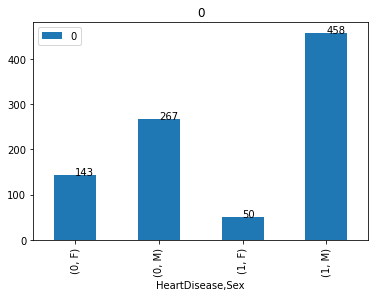

In [10]:
x.plot.bar(subplots=True)
for index, value in enumerate(x[0]):
    plt.text(index, value, str(value))

array([<AxesSubplot:ylabel='0'>], dtype=object)

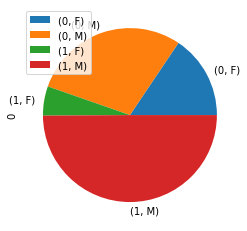

In [11]:
x.plot.pie(subplots=True)

In [12]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y=data['Age'].value_counts(bins=bins, sort=False) 

In [13]:
y

(-0.001, 10.0]      0
(10.0, 20.0]        0
(20.0, 30.0]        5
(30.0, 40.0]       88
(40.0, 50.0]      223
(50.0, 60.0]      381
(60.0, 70.0]      197
(70.0, 80.0]       24
(80.0, 90.0]        0
(90.0, 100.0]       0
Name: Age, dtype: int64

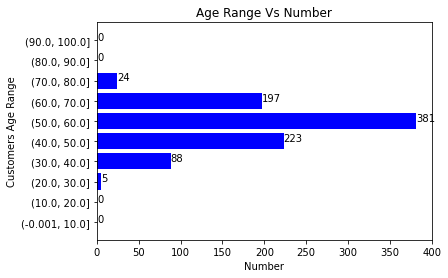

In [14]:
plt.barh(y.keys().astype('string'),dict(y).values(), color ='blue')
 
plt.xlabel("Number")
plt.ylabel("Customers Age Range")
plt.title("Age Range Vs Number")
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.show()

Most of the people are from age range 30-60 

CONCLUSTION 2 : Potential age range of customers is 30-60

In [15]:
x=pd.DataFrame(data.groupby(["HeartDisease",'Sex','Age']).size())

In [16]:
x

0
HeartDisease Sex Age   
0            F   30   1
                 31   1
                 32   1
                 34   2
                 35   3
...                  ..
1            M   72   3
                 74   5
                 75   2
                 76   1
                 77   2

[151 rows x 1 columns]

<AxesSubplot:xlabel='HeartDisease,Sex,Age'>

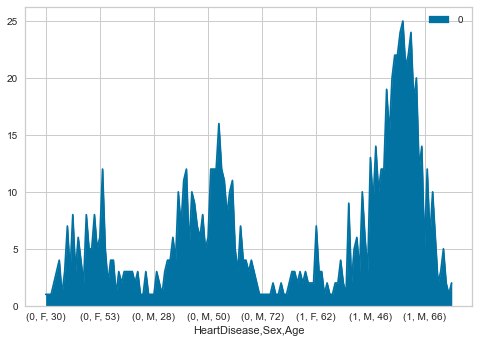

In [52]:
x.plot.area()

From the above area Map we can see :

CONCLUSION 3 : 1. Female with Hart disease are very less and Male with Heart Disese are more
               2. Either in male or in Female alawys the dominating age is 30-60

In [53]:
pt=pd.pivot_table(x,values=0,columns='HeartDisease',index=['Sex','Age'],aggfunc=np.sum,)

<AxesSubplot:xlabel='Sex,Age'>

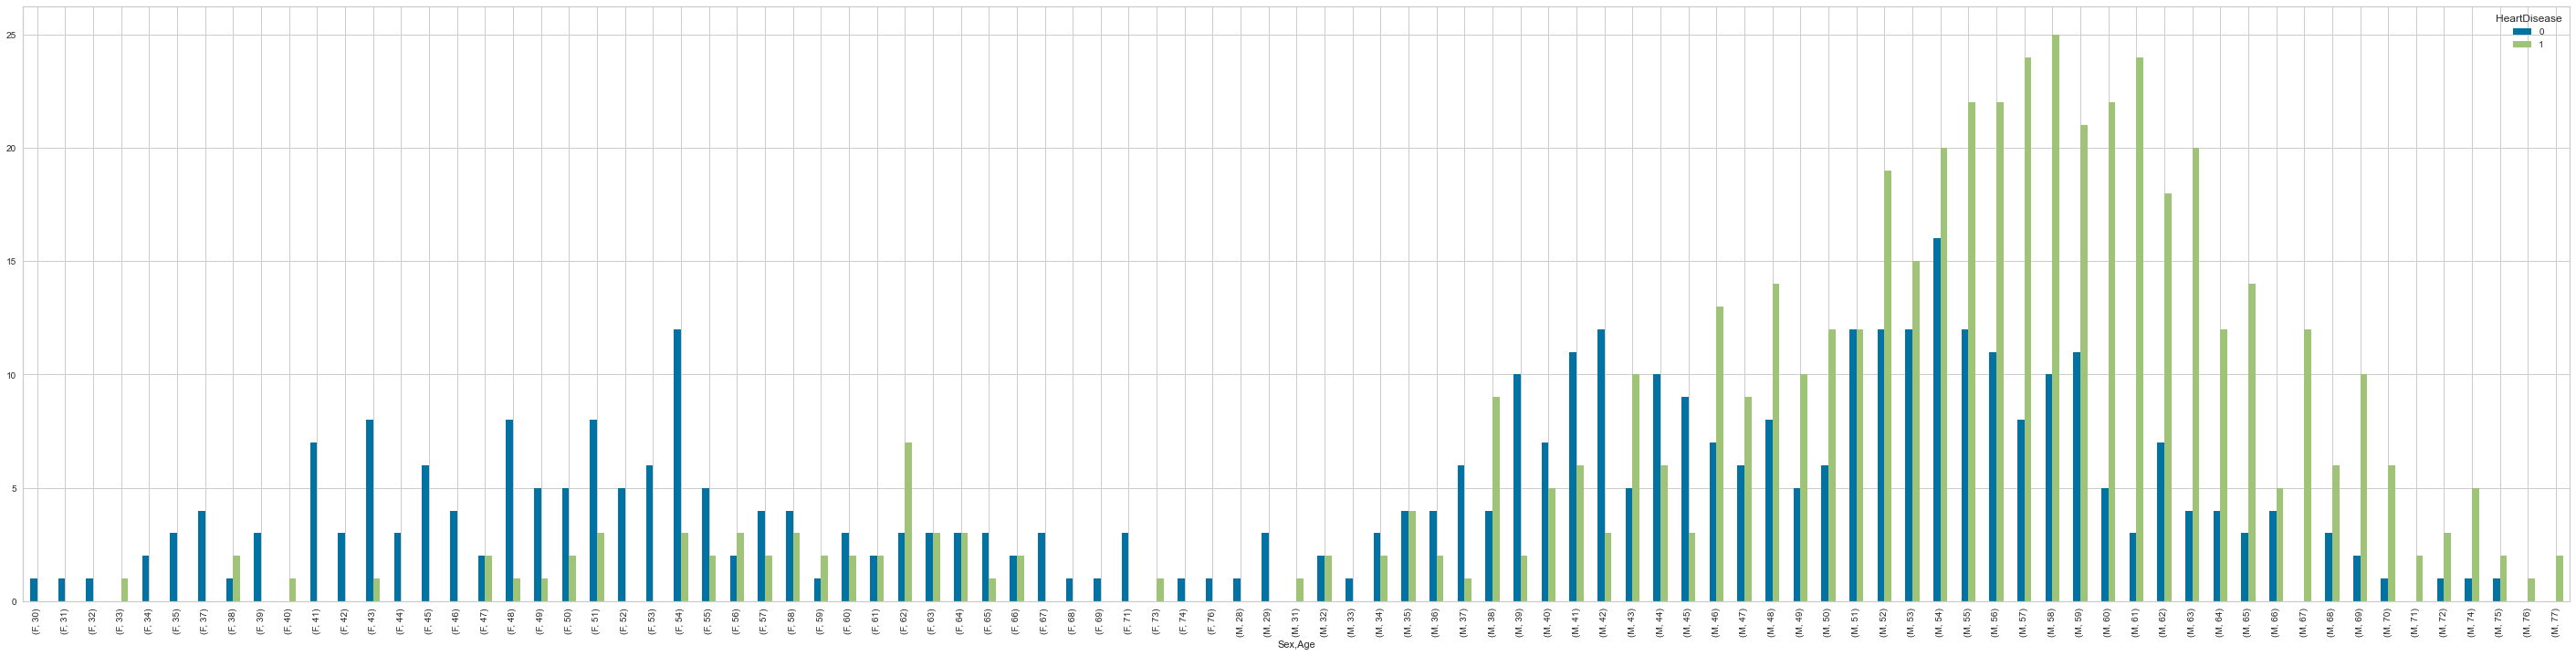

In [74]:
pt.plot.bar(figsize=(50,12))

In [20]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\VIKAS REDDY\AppData\Local\Temp/ipykernel_2456/3239794090.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(3)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000,0.254,-0.095,0.198,-0.382,0.259,0.282
RestingBP,0.254,1.000,0.101,0.070,-0.112,0.165,0.108
Cholesterol,-0.095,0.101,1.000,-0.261,0.236,0.050,-0.233
FastingBS,0.198,0.070,-0.261,1.000,-0.131,0.053,0.267
MaxHR,-0.382,-0.112,0.236,-0.131,1.000,-0.161,-0.400
Oldpeak,0.259,0.165,0.050,0.053,-0.161,1.000,0.404
HeartDisease,0.282,0.108,-0.233,0.267,-0.400,0.404,1.000


As we can see no column is co-related to any other column

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [22]:
cols=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [23]:
data[cols] = data[cols].apply(LabelEncoder().fit_transform)

In [24]:
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [81]:
inner=pd.DataFrame(data.groupby(["HeartDisease","Sex","FastingBS"]).size())

In [82]:
inner

0
HeartDisease Sex FastingBS     
0            0   0          133
                 1           10
             1   0          233
                 1           34
1            0   0           34
                 1           16
             1   0          304
                 1          154

In [86]:
inner=pd.pivot_table(inner,values=0,columns='HeartDisease',index=['Sex','FastingBS'],aggfunc=np.sum,)

<AxesSubplot:xlabel='Sex,FastingBS'>

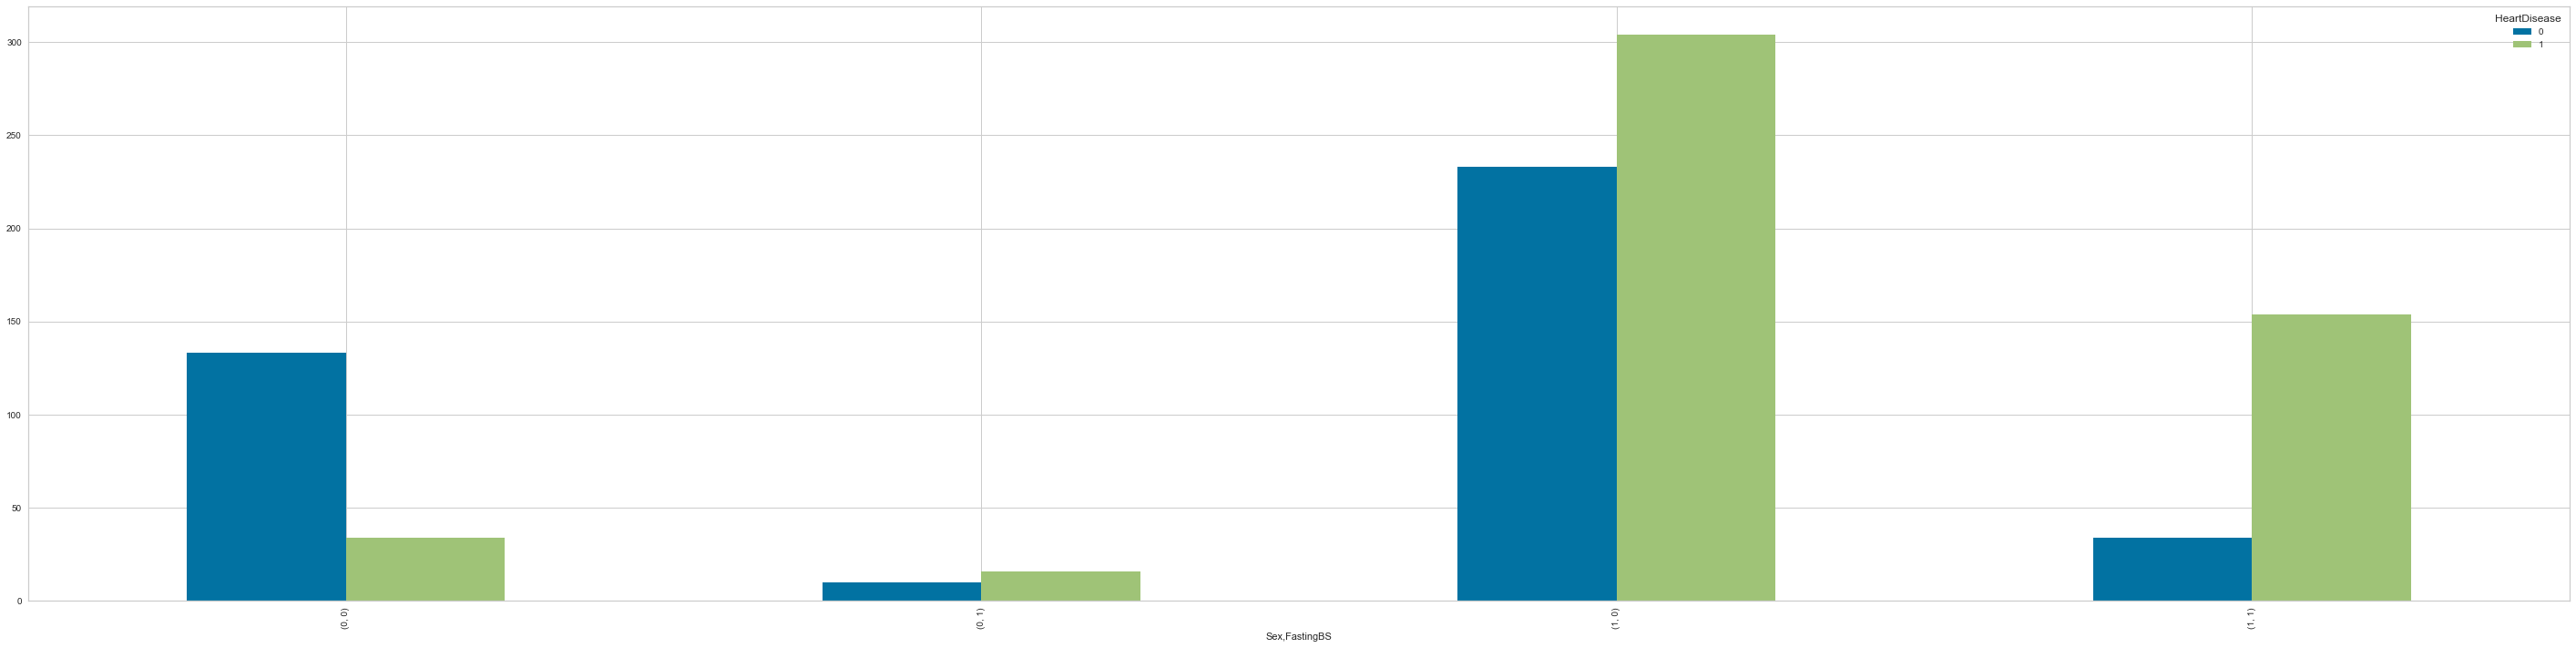

In [87]:
inner.plot.bar(figsize=(50,12))

C:\Users\VIKAS REDDY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


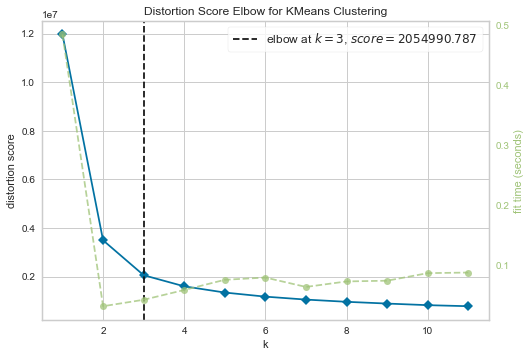

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmc = KMeans()
visualizer = KElbowVisualizer(kmc, k=(1,12)).fit(data)
visualizer.show()

In [28]:
kmc = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(data)
# data['cluster_num']=kmc.labels_

In [29]:
data.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0


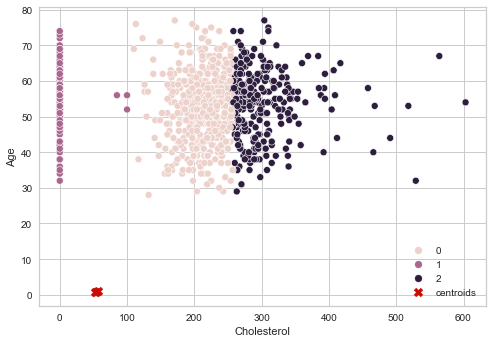

In [30]:
sns.scatterplot(data=data, x="Cholesterol", y="Age", hue=kmc.labels_)
plt.scatter(kmc.cluster_centers_[:,0], kmc.cluster_centers_[:,1],marker="X", c="r", s=80, label="centroids") 
plt.legend()
plt.show()

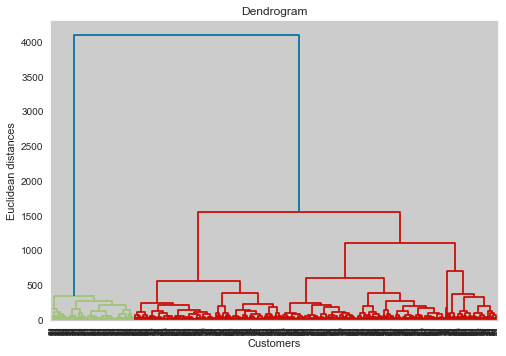

In [31]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [32]:
from sklearn.cluster import AgglomerativeClustering,linkage_tree

In [33]:
agc=AgglomerativeClustering(n_clusters=3).fit(data)
litree=linkage_tree(data)

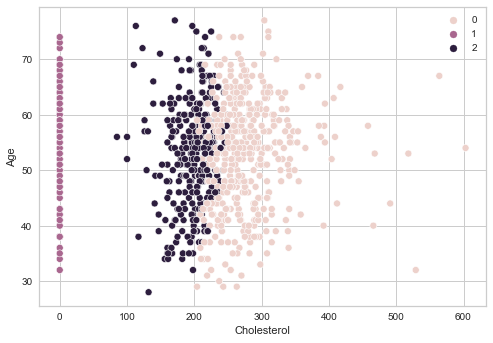

In [34]:
sns.scatterplot(data=data, x="Cholesterol", y="Age", hue=agc.labels_)
plt.legend()
plt.show()

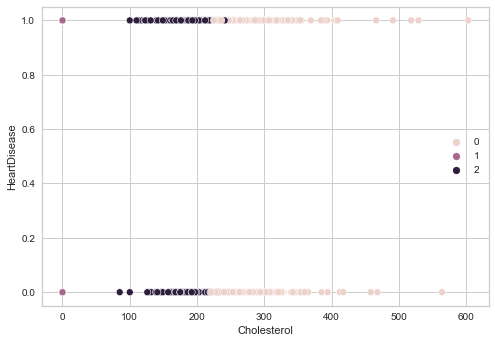

In [35]:
sns.scatterplot(data=data, x="Cholesterol", y="HeartDisease", hue=agc.labels_)
plt.legend()
plt.show()

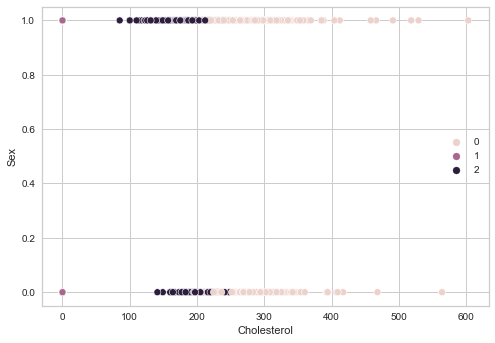

In [36]:
sns.scatterplot(data=data, x="Cholesterol", y="Sex", hue=agc.labels_)
plt.legend()
plt.show()

In [37]:
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1


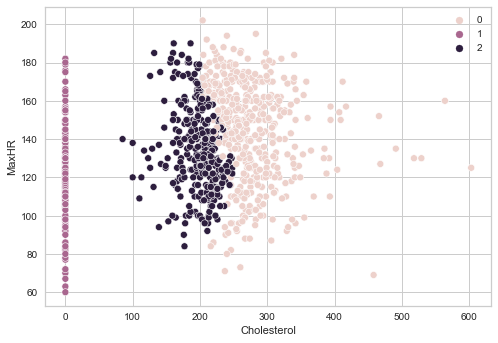

In [38]:
sns.scatterplot(data=data, x="Cholesterol", y="MaxHR", hue=agc.labels_)
plt.legend()
plt.show()

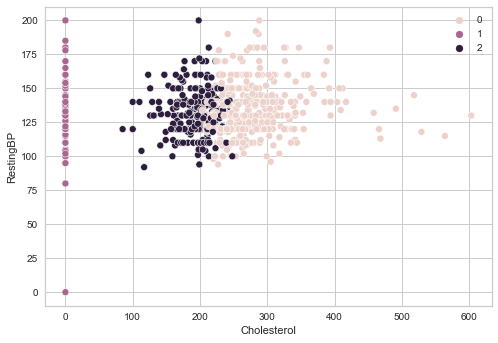

In [39]:
sns.scatterplot(data=data, x="Cholesterol", y="RestingBP", hue=agc.labels_)
plt.legend()
plt.show()

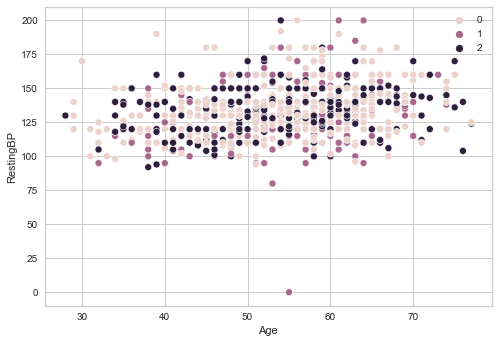

In [40]:
sns.scatterplot(data=data, x="Age", y="RestingBP", hue=agc.labels_)
plt.legend()
plt.show()

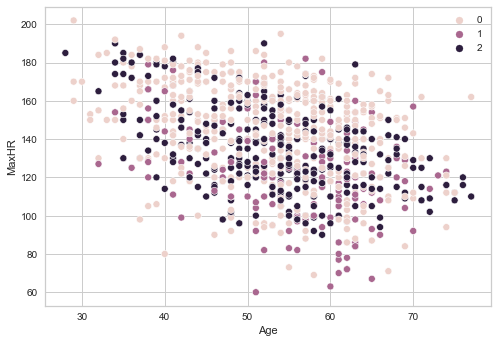

In [41]:
sns.scatterplot(data=data, x="Age", y="MaxHR", hue=agc.labels_)
plt.legend()
plt.show()

In [88]:
data['cluster_num']=kmc.labels_

In [101]:
data=data.sort_values('cluster_num')
data['cluster_num'].value_counts()

0    464
2    279
1    175
Name: cluster_num, dtype: int64

In [110]:
clus=pd.DataFrame(data.groupby(["cluster_num","HeartDisease","Sex"]).size())

<AxesSubplot:ylabel='cluster_num,HeartDisease,Sex'>

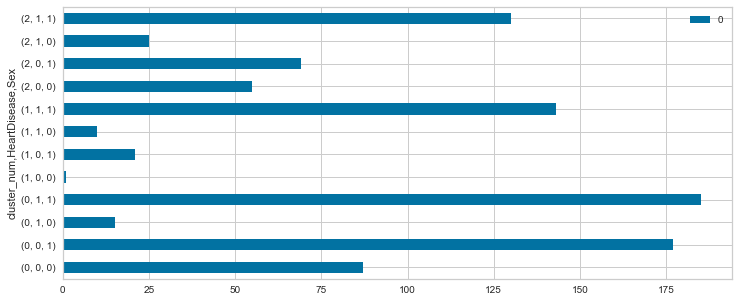

In [116]:
clus.plot.barh(stacked=True,figsize=(12,5))

# Target Segemnt will have patients showing characteristics as follows-
1. Age above 50
2. heart disease
3. MaxHR > 150
4. Cholestrol valyues > 200